In [ ]:
import sys
!{sys.executable} -m pip3 install pandas
!{sys.executable} -m pip3 install numpy
!{sys.executable} -m pip install matplotlib

#### import libraries

In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math
pandas.options.mode.chained_assignment = None

#### part A: Reading file and show scatter plot of them

(300, 2)


<AxesSubplot:xlabel='x', ylabel='y'>

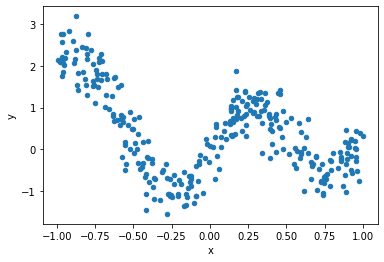

In [7]:
dataset1 = pandas.read_csv('dataset1.csv')
print(dataset1.shape)
dataset1.plot(x ='x', y='y', kind = 'scatter')

#### Part B: suffel data

In [8]:
dataset1 = dataset1.sample(frac=1).reset_index(drop=True)
dataset1.head(100)

,x,y
0,0.130843,0.617348
1,-0.735864,1.811426
2,0.233868,1.031576
3,0.793343,-0.292342
4,0.089766,0.427504
...,...,...
95,-0.553837,-0.503306
96,0.363641,1.055085
97,-0.203558,-0.742205
98,-0.067378,-0.273393


#### Part C: some function for gradient descent algorithem

In [9]:
def create_multi_degree_data(data, degree):
    # Regression part: get data and degree and create matrix of data with from 1 to that degree
    new_data = [[1 for _ in range(data.shape[0])],]
    for i in range(1, degree+1):
        new_data.append(data[:] ** i)
    new_data = np.array(new_data).T
    return new_data 

In [49]:
def data_to_matrix(path, degree):
    # Regression part: read data and convert it to numpy matrix and separate training and testing data
    dataset1 = pandas.read_csv(path)
    dataset1 = dataset1.sample(frac=1)
    data = dataset1['x'].to_numpy()
    data = create_multi_degree_data(data, degree)
    label = dataset1['y'].to_numpy()
    label = label.reshape((label.shape[0],1))
    l = int(0.8*data.shape[0])
    X_train, X_test, y_train, y_test = data[:l], data[l:], label[:l], label[l:]
    return X_train, X_test, y_train, y_test

In [11]:
def calculate_new_weights(X, y, weights, lr):
    # Regression part: Calculate new weights for this step
    gradian = (X.T @ X @ weights) - (X.T @ y)
    gradian = gradian / np.linalg.norm(gradian)
    new_weights = weights - (lr * gradian)
    return new_weights

In [12]:
def calculate_error(X, y, weights, error_type):
    # Regression part: Calculate error in three types of error
    if error_type == 'MSE':
        error = np.square((X @ weights) - y).mean()
    elif error_type == 'RMSE':
        error = (np.square((X @ weights) - y).mean())**0.5
    elif error_type == 'MAE':
        error = np.abs((X @ weights) - y).mean()
    else:
        print('error type must be one of "MSE", "RMSE", "MAE"')
    return error

In [13]:
def gradient_descent(X_train, X_test, y_train, y_test, weights, lr, number_of_steps, error_type):
    # Regression part: Do gradian descent algorithm
    train_errors = []
    test_errors = []
    lrs = []
    for i in range(number_of_steps):
        # Save errors and lr to plot at the end of algorithem
        lrs.append(lr)
        train_error = calculate_error(X_train, y_train, weights, error_type)
        train_errors.append(train_error)
        test_error = calculate_error(X_test, y_test, weights, error_type)
        test_errors.append(test_error)
#         print('---step ' + str(i) + '------ error: ' + str(error))

        weights = calculate_new_weights(X_train, y_train, weights, lr)
        lr = 10/(i+1) # Change leaning rate
        if train_error < 0.001:
            print('error is less than 0.001')
            break
    return weights, train_errors, test_errors, lrs

In [14]:
def run_algorithem(degree, number_of_steps, error_type):
    # Regression part: Get data and run gradian descen algorithm with that
    X_train, X_test, y_train, y_test = data_to_matrix('dataset1.csv', degree)
    weights = np.full((X_train.shape[1], 1), 0.1)
    lr = 10  # learning rate
    best_weights, train_errors, test_errors, lrs = gradient_descent(X_train, X_test, y_train, y_test, weights, lr, number_of_steps, error_type)
    print('error in train data:' + str(calculate_error(X_train, y_train, best_weights, error_type)))
    print('error in test data:' + str(calculate_error(X_test, y_test, best_weights, error_type)))
    return best_weights, train_errors, test_errors, lrs

##### Run algorithm and get weights and errors and lr using above functions

In [118]:
degree = 10
epochs = 10000
error_type = 'RMSE'
coefficients, train_errors, test_errors, lrs = run_algorithem(degree, epochs, error_type)


error in train data:0.4138498803263911
error in test data:0.4336100323415791


##### plot result line 

In [119]:
def plot_line(degree, coefficients, title):
    X = [-1+0.01*i for i in range(200)]
    Y = [sum([coefficients[i]*(x**i) for i in range(degree+1)]) for x in X]
    plt.plot(X, Y)
    plt.title(title)
    plt.show()

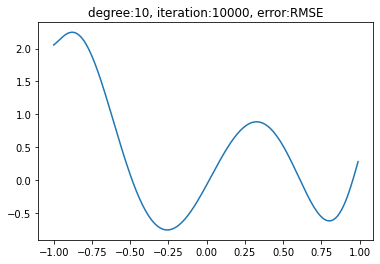

In [120]:
title = 'degree:' + str(degree) + ', iteration:' + str(epochs) + ', error:' + str(error_type)
plot_line(degree, coefficients, title)

#### Part D: plot errors in training and testing part and learning rate per iterration

In [121]:
def plot_errors(train_errors, test_errors, title):
    x1 = [i for i in range(len(train_errors))]
    y1 = train_errors
    plt.plot(x1, y1, label = "train errors", )
    x2 = [i for i in range(len(test_errors))]
    y2 = test_errors
    plt.plot(x2, y2, label = "test errors", )
    plt.title(title)
    plt.legend()
    plt.show()

def plot_lrs(lrs):
    x3 = [i for i in range(len(lrs))]
    y3 = lrs
    plt.plot(x3, y3, label = "learnin rate")
    plt.legend()
    plt.yticks(np.arange(0, 10, 2))
    plt.show()

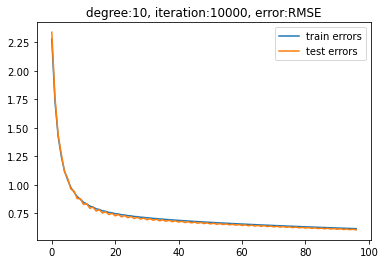

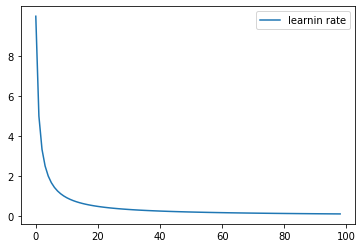

In [122]:
title = 'degree:' + str(degree) + ', iteration:' + str(epochs) + ', error:' + str(error_type)
plot_errors(train_errors[3:100], test_errors[3:100], title)
plot_lrs(lrs[1:100])


### Part E: solve the problem using Normal Equesion

In [123]:
def normal_equesion(degree, error_type):
    X_train, X_test, y_train, y_test = data_to_matrix('dataset1.csv', degree)
    weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    print('error in train data:' + str(calculate_error(X_train, y_train, weights, error_type)))
    print('error in test data:' + str(calculate_error(X_test, y_test, weights, error_type)))
    plot_line(degree, weights, 'degree: ' + str(degree))

error in train data:0.15849427834684698
error in test data:0.1432712469634771


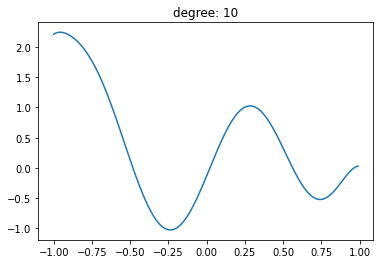

In [124]:
degree = 10
error_type = 'MSE'
normal_equesion(degree, error_type)

### Part F: Normal Equesion with regularization

In [125]:
def normal_equesion_with_regularization(degree, reg, error_type):
    new_matrix = np.identity(X_train.shape[1]) * reg  # This matrix is λI
    weights = np.linalg.inv((X_train.T @ X_train) + new_matrix) @ X_train.T @ y_train
    train_error = calculate_error(X_train, y_train, weights, error_type)
    test_error = calculate_error(X_test, y_test, weights, error_type)
    return train_error, test_error

In [126]:
def plot_points(train_errors, test_errors, lambda_values, title):
    plt.plot(lambda_values, train_errors, label = "train errors", )
    plt.plot(lambda_values, test_errors, label = "test errors", )
    plt.title(title)
    plt.xlabel("lambda")
    plt.ylabel("error")
    plt.legend()
    plt.show()

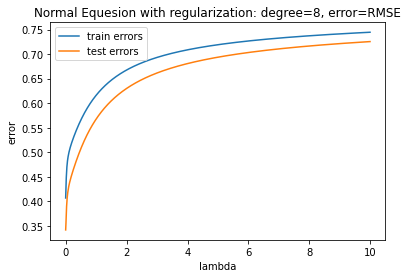

In [127]:
X_train, X_test, y_train, y_test = data_to_matrix('dataset1.csv', degree)
degree = 8
error_type = 'RMSE'
train_errors, test_errors = [], []
lambda_values = []
for i in range(1000):
    lambda_value = 0.01*i
    lambda_values.append(lambda_value)
    train_error, test_error = normal_equesion_with_regularization(degree, lambda_value, error_type)
    train_errors.append(train_error) 
    test_errors.append(test_error)
title = 'Normal Equesion with regularization: degree=' + str(degree) + ', error=' + str(error_type)
plot_points(train_errors, test_errors, lambda_values, title)